<a href="https://colab.research.google.com/github/Aunsiakhan/Aunsiakhan/blob/main/Aunsia_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv('/content/investigator_nacc66.csv')  # Replace 'your_file.csv' with your actual file path

# Step 2: Calculate the percentage of missing values in each column
missing_percent = df.isnull().mean()

# Step 3: Identify columns with 60% or more missing values
columns_to_drop = missing_percent[missing_percent >= 0.60].index

# Step 4: Drop the identified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Step 5: (Optional) Save the cleaned DataFrame back to a CSV file
df_cleaned.to_csv('cleaned_file.csv', index=False)  # Replace 'cleaned_file.csv' with your desired file name

print(f"Original DataFrame had {df.shape[1]} columns.")
print(f"Cleaned DataFrame has {df_cleaned.shape[1]} columns.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/investigator_nacc66.csv'

In [ ]:
print("Cleaned CSV file has been saved as 'cleaned_file.csv'.")


Cleaned CSV file has been saved as 'cleaned_file.csv'.


In [ ]:
import pandas as pd

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv('/content/original file with columns removed having 60% missing values.csv')  # Replace 'your_file.csv' with the path to your actual file

# Step 2: Identify the number of distinct values in the 'NACCUDSD' column
distinct_values_count = df['NACCUDSD'].nunique()

print(f"The 'NACCUDSD' column has {distinct_values_count} distinct values.")

The 'NACCUDSD' column has 4 distinct values.


<ipython-input-18-e26208a41164>:4: DtypeWarning: Columns (480,705) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/original file with columns removed having 60% missing values.csv')  # Replace 'your_file.csv' with the path to your actual file


In [27]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load your dataset
df = pd.read_csv('/content/investigator_nacc66.csv')  # Replace 'your_file.csv' with the path to your actual file

# Optional: Step 2a: Handle missing values (e.g., remove rows/columns, fill with mean, etc.)
df = df.dropna()  # This is just an example, you may choose a different strategy based on your data

# Step 2b: Separate features from the target (if you have a target column)
# Assuming all columns are features, or you can select specific ones
X = df.select_dtypes(include=[float, int]).values  # Only numeric data

# Step 2c: Normalize the data (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Visualize the t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', edgecolor='k', s=50)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


<ipython-input-27-d4889704ae18>:7: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/investigator_nacc66.csv')  # Replace 'your_file.csv' with the path to your actual file


ValueError: Found array with 0 sample(s) (shape=(0, 882)) while a minimum of 1 is required by StandardScaler.

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Load your dataset
df = pd.read_csv('/content/original file with columns removed having 60% missing values.csv')  # Replace 'your_file.csv' with the path to your actual file

# Optional: Step 2a: Handle missing values (e.g., remove rows/columns, fill with mean, etc.)
df = df.dropna()  # This is just an example, you may choose a different strategy based on your data

# Step 2b: Separate features (drop the target column if present)
# Assuming all columns are features or you can exclude the target column explicitly
X = df.select_dtypes(include=[float, int])  # Use only numeric columns

# Step 2c: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Step 4: Identify the most important features
# Compute the absolute value of PCA components to find which original features contribute the most
components = np.abs(pca.components_)

# Sum the contributions of each feature across all components
feature_importance = components.sum(axis=0)

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Step 5: Select the top N features based on PCA contributions
N = 10  # Adjust this number based on how many features you want to keep
selected_features = X.columns[sorted_idx[:N]]

# Create a reduced dataset with the selected features
df_reduced = df[selected_features]

# Step 6: Save the reduced dataset to a CSV file
df_reduced.to_csv('reduced_dataset.csv', index=False)

print(f"The reduced dataset with the most important features has been saved as 'reduced_dataset.csv'.")
print(f"Selected features: {list(selected_features)}")


The reduced dataset with the most important features has been saved as 'reduced_dataset.csv'.
Selected features: ['NACCVASD', 'DYSILL', 'NACCAANX', 'COGVIS', 'NACCDBMD', 'BEDEP', 'SMOKYRS', 'NACCCOGF', 'IMPNOMCI', 'ANXSEV']


<ipython-input-26-267bf32a551f>:6: DtypeWarning: Columns (480,705) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/original file with columns removed having 60% missing values.csv')  # Replace 'your_file.csv' with the path to your actual file


In [ ]:
import pandas as pd

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv('/content/original file with columns removed having 60% missing values.csv')  # Replace 'your_file.csv' with the path to your actual file

# Step 2: Get the distinct values and their counts in the 'NACCETPR' column
distinct_values_counts = df['NACCETPR'].value_counts()

print(f"Distinct values and their counts in the 'NACCETPR' column:\n{distinct_values_counts}")

Distinct values and their counts in the 'NACCETPR' column:
NACCETPR
88.0    885
1.0     592
7.0     200
8.0      70
30.0     70
2.0      51
4.0      43
5.0      42
19.0     37
18.0     25
28.0     22
99.0     16
13.0     13
22.0     11
6.0       7
12.0      7
25.0      5
16.0      4
26.0      3
29.0      3
15.0      2
24.0      2
20.0      2
3.0       1
10.0      1
11.0      1
Name: count, dtype: int64


<ipython-input-15-d12b86da8cba>:4: DtypeWarning: Columns (480,705) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/original file with columns removed having 60% missing values.csv')  # Replace 'your_file.csv' with the path to your actual file


In [ ]:
unique_naccid_count = df['NACCID'].nunique()
print(f"The count of unique NACCID values: {unique_naccid_count}")

# Step 3: Drop duplicate rows based on the 'NACCID' column, keeping only the first occurrence
df_unique_naccid = df.drop_duplicates(subset='NACCID')

# Step 4: Save the resulting DataFrame to a new CSV file
df_unique_naccid.to_csv('unique_naccid.csv', index=False)  # Replace 'unique_naccid.csv' with your desired output file name

print(f"The CSV file with unique NACCID values has been saved as 'unique_naccid.csv'.")

The count of unique NACCID values: 1107
The CSV file with unique NACCID values has been saved as 'unique_naccid.csv'.


In [ ]:
# Step 2: Get the distinct values and their counts in the 'NACCVNUM' column
distinct_values_counts = df['NACCVNUM'].value_counts()

print(f"Distinct values and their counts in the 'NACCVNUM' column:\n{distinct_values_counts}")

Distinct values and their counts in the 'NACCVNUM' column:
NACCVNUM
1     1107
2      490
3      205
4      101
5       59
6       42
7       32
8       22
9       19
10      14
11       9
12       7
13       4
14       3
15       2
Name: count, dtype: int64


In [ ]:
# Step 2: Drop duplicate rows based on the 'NACCID' column, keeping only the first occurrence
df_unique_naccid = df.drop_duplicates(subset='NACCID')

# Step 3: Save the resulting DataFrame to a new CSV file
df_unique_naccid.to_csv('unique_naccid.csv', index=False)  # Replace 'unique_naccid.csv' with your desired output file name

print(f"The CSV file with unique NACCID values has been saved as 'unique_naccid.csv'.")


The CSV file with unique NACCID values has been saved as 'unique_naccid.csv'.


In [3]:
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv('/investigator_nacc66.csv')  # Replace 'your_file.csv' with the path to your actual file

# Step 2: Identify and remove columns with more than 60% missing values
threshold = 0.60  # 60% threshold for missing values
df_cleaned = df.loc[:, df.isnull().mean() <= threshold]

# Step 3: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print(f"The cleaned dataset has been saved as 'cleaned_dataset.csv'.")


<ipython-input-3-b522d6f6d5d8>:4: DtypeWarning: Columns (20,24,26,41,46,48,51,61,63,65,67,69,71,92,93,94,95,96,97,98,99,100,101,102,103,156,165,217,220,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,399,401,421,423,432,445,454,494,574,605,613,638,674,690,707,710,727,744,802,803,808,809,810,811,832,842,903,958,959,960,981,1003,1006,1009) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/investigator_nacc66.csv')  # Replace 'your_file.csv' with the path to your actual file


The cleaned dataset has been saved as 'cleaned_dataset.csv'.


<ipython-input-10-3e83eef28a04>:7: DtypeWarning: Columns (399,479,703) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_dataset.csv')  # Replace 'your_file.csv' with the path to your actual file


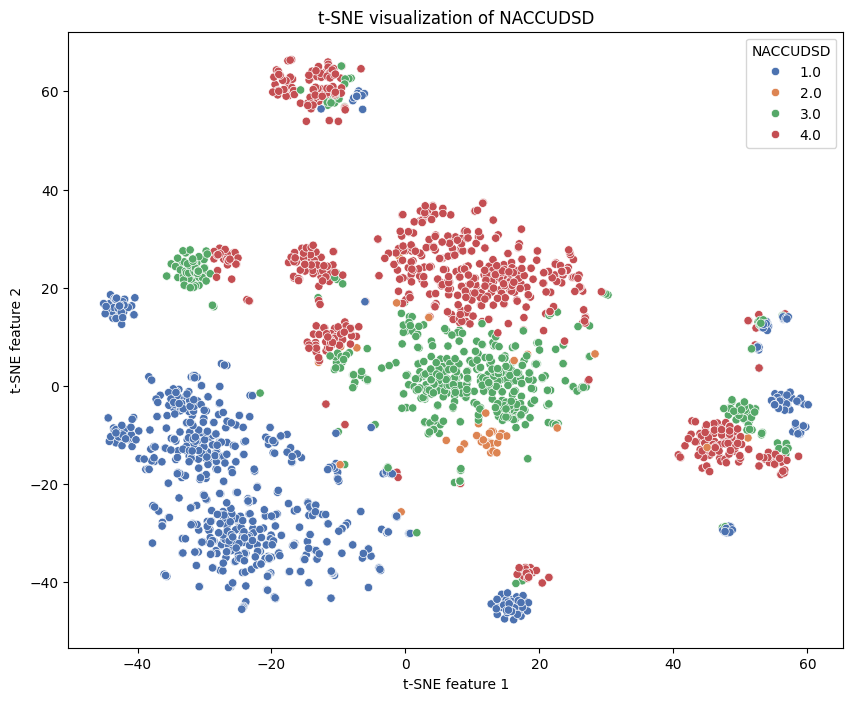

In [10]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load your dataset
df = pd.read_csv('/content/cleaned_dataset.csv')  # Replace 'your_file.csv' with the path to your actual file

# Optional: Step 2a: Handle missing values (e.g., remove rows/columns, fill with mean, etc.)
df = df.dropna()  # This is just an example, you may choose a different strategy based on your data

# Step 2b: Separate features from the target (if you have a target column)
# Assuming all columns are features, or you can select specific ones
X = df.select_dtypes(include=[float, int]).values  # Only numeric data

# Step 2c: Normalize the data (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract features (excluding the target 'NACCUDSD') and target variable
X = df.drop(columns=['NACCUDSD'])
y = df['NACCUDSD']

# Step 3: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="deep", legend="full")

# Add plot title and labels
plt.title('t-SNE visualization of NACCUDSD')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='NACCUDSD', loc='best')
plt.show()


## Step 4: Visualize the t-SNE results
#plt.figure(figsize=(10, 7))
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', edgecolor='k', s=50)
#plt.title('t-SNE visualization')
#plt.xlabel('t-SNE 1')
#plt.ylabel('t-SNE 2')
#plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV file into a DataFrame
df = pd.read_csv('/content/cleaned_dataset.csv')  # Replace 'your_file.csv' with your actual file

# Step 2: Preprocess the data
# Drop any rows with missing values (if applicable)
df = df.dropna()

# Step 2b: Separate features from the target (if you have a target column)
# Assuming all columns are features, or you can select specific ones
X = df.select_dtypes(include=[float, int]).values  # Only numeric data

# Step 2c: Normalize the data (important for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract features (excluding the target 'NACCUDSD') and target variable
X = df.drop(columns=['NACCUDSD'])
y = df['NACCUDSD']

# Step 3: Apply t-SNE for dimensionality reduction
# Use t-SNE to reduce to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 4: Visualize the t-SNE results
# Create a scatter plot of the t-SNE output, coloring by the 'NACCUDSD' target class
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="deep", legend="full")

# Add plot title and labels
plt.title('t-SNE visualization of NACCUDSD')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='NACCUDSD', loc='best')
plt.show()

# Optional: If you want to save the plot
plt.savefig('tsne_visualization.png')


<ipython-input-7-b2680cf214a7>:8: DtypeWarning: Columns (399,479,703) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cleaned_dataset.csv')  # Replace 'your_file.csv' with your actual file


ValueError: could not convert string to float: 'NACC017883'